In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint  # ODE integratation solver
from scipy.optimize import minimize

# Inverse Problem Example

**Task:** Solve an inverse problem in the context of an ordinary differential equation (ODE) by estimating unknown parameters from observed data.

Consider the logistic growth model below:

$$\frac{dP}{dt} = rP(1 - \frac{P}{K})$$

Where:
- P(t) is the population at time t (state variable)
- r: Growth rate (parameter to estimate)
- K: Carrying capacity (parameter to estimate)
- t: Time (independent variable)

Given a set of observed data points, estimate the parameters $r$ and $K$ such that the ODE model fits the observed data.

Set $P_0 = 20$ as the initial population state

In [77]:
p0 = 2

Establish (known) parameters on which to generate observed data. These can be used to verify correctness of inverse problem solution.

Let:
$$r = 0.1$$
$$K = 500$$

In [125]:
r_known = 0.1
K_known = 500

In [126]:
t = np.linspace(0, 100, 1000)

In [129]:
def log_growth(P, t, r, K):
    dPdt = r * P * (1 - (P / K))
    return dPdt

In [132]:
def solve_logistic_growth(t, P0, r, k):
    sol = odeint(log_growth, P0, t, args=(r, k))
    return sol

In [152]:
Y = solve_logistic_growth(t, p0, r_known, K_known)

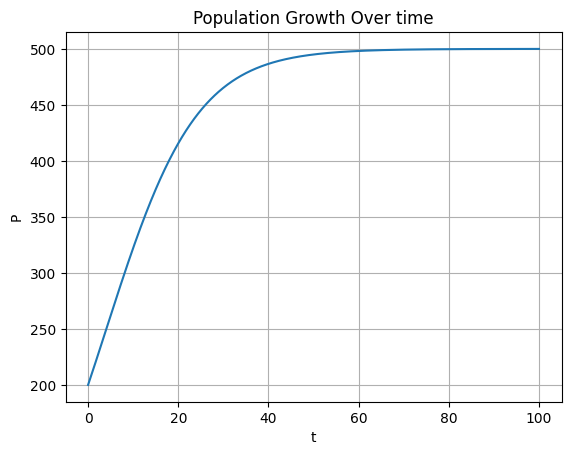

In [153]:
plt.plot(t, Y)

plt.xlabel('t')
plt.ylabel('P')
plt.title('Population Growth Over time')
plt.grid()
plt.show()

The above represents the observed data points. From this point we will construct the inverse problem solution

## Inverse Problem
The inverse problem objective function can be structured as:

$$J(r, K) = (f(p, t, r, k) - Y)^2$$

Where $f(p, t, r, k)$ is the forward function representing the logistic growth model with parameters $r$ and $K$
and $Y$ is the observed data

In [184]:
r_guess = 1.5
k_guess = 200

In [185]:
def loss_func(params, t, p0, Y):
    r, k = params
    p_model = solve_logistic_growth(t, p0, r, k)
    J = np.sum((p_model - Y) ** 2)
    return J

Establish bounds as both $r$ and $k$ should not go below zero

In [186]:
bounds = [(0, None), (0, None)]

Create callback function to track change in parameters over iterations of minimization

In [187]:
iteration_params = []

def callback(params):
    iteration_params.append(params.copy())

Perform optimization on cost function

In [188]:
opt_sol = minimize(loss_func, 
                   x0=[r_guess, k_guess], 
                   args=(t, p0, Y),
                   method='L-BFGS-B',
                   bounds=bounds,
                   callback=callback)

In [189]:
r_opt, k_opt = opt_sol.x
print(f'Optimized r {r_opt} and optimized k {k_opt}')

Optimized r 0.09999999552387968 and optimized k 500.00000334890746


In [190]:
Y_pred = solve_logistic_growth(t, p0, r_opt, k_opt)

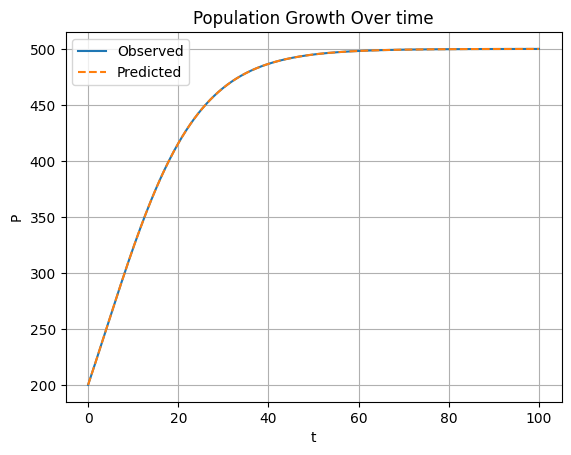

In [191]:
plt.plot(t, Y, label='Observed')
plt.plot(t, Y_pred, '--', label='Predicted')

plt.xlabel('t')
plt.ylabel('P')
plt.title('Population Growth Over time')
plt.grid()
plt.legend()
plt.show()

Visualize the optimization process as the change in parameters over time

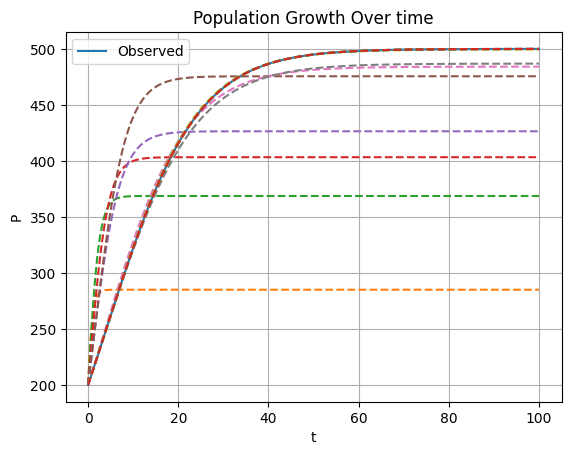

In [193]:
plt.plot(t, Y, label='Observed')

for r, k in iteration_params:
    Y_iter = solve_logistic_growth(t, p0, r, k)
    plt.plot(t, Y_iter, '--')

plt.xlabel('t')
plt.ylabel('P')
plt.title('Population Growth Over time')
plt.grid()
plt.legend()
plt.show()

The above visualization shows the optimization of parameters $k$ and $r$ over each iteration of minimization.